## 1. Importing Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Initial Inspection

In [4]:
rta_data = pd.read_csv('https://raw.githubusercontent.com/imshrey26/Road-Traffic-Severity-Classification/main/RTA%20Dataset.csv')

In [5]:
rta_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
rta_data.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11679,18:12:00,Wednesday,18-30,Male,High school,Employee,Above 10yr,Public (13?45 seats),Organization,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
7325,8:25:00,Monday,31-50,Male,Junior high school,Employee,5-10yr,Public (12 seats),Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
2379,21:23:00,Saturday,18-30,Male,NaN,NaN,NaN,Automobile,NaN,NaN,...,Going straight,Passenger,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
4951,19:25:00,Wednesday,Unknown,Male,Junior high school,Employee,1-2yr,Public (12 seats),Governmental,Unknown,...,Other,Pedestrian,Male,Under 18,3,Self-employed,Normal,Crossing from driver's nearside,No distancing,Slight Injury
4652,8:05:00,Wednesday,18-30,Male,Junior high school,Employee,Above 10yr,Public (12 seats),Owner,Above 10yr,...,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


#  3. EDA

In [8]:
rta_data.shape

(12316, 32)

In [9]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
col_map={
    'Time': 'time',
    'Day_of_week': 'day_of_week',
    'Age_band_of_driver': 'driver_age',
    'Sex_of_driver': 'driver_sex',
    'Educational_level': 'educational_level',
    'Vehicle_driver_relation': 'vehicle_driver_relation',
    'Driving_experience': 'driving_experience',
    'Type_of_vehicle': 'vehicle_type',
    'Owner_of_vehicle': 'vehicle_owner',
    'Service_year_of_vehicle': 'service_year',
    'Defect_of_vehicle': 'vehicle_defect',
    'Area_accident_occured': 'accident_area',
    'Lanes_or_Medians': 'lanes',
    'Road_allignment': 'road_allignment',
    'Types_of_Junction': 'junction_type',
    'Road_surface_type': 'surface_type',
    'Road_surface_conditions': 'road_surface_conditions',
    'Light_conditions': 'light_condition',
    'Weather_conditions': 'weather_condition',
    'Type_of_collision': 'collision_type',
    'Number_of_vehicles_involved': 'vehicles_involved',
    'Number_of_casualties': 'casualties',
    'Vehicle_movement': 'vehicle_movement',
    'Casualty_class': 'casualty_class',
    'Sex_of_casualty': 'casualty_sex' , 
    'Age_band_of_casualty': 'casualty_age', 
    'Casualty_severity': 'casualty_severity',
    'Work_of_casuality': 'casualty_work', 
    'Fitness_of_casuality': 'casualty_fitness',
    'Pedestrian_movement': 'pedestrian_movement',
    'Cause_of_accident': 'accident_cause',
    'Accident_severity': 'accident_severity'
}
rta_data.rename(columns=col_map, inplace=True)

In [11]:
rta_data.describe()

,vehicles_involved,casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
rta_data.describe(include=['O']).T

,count,unique,top,freq
time,12316,1074,15:30:00,120
day_of_week,12316,7,Friday,2041
driver_age,12316,5,18-30,4271
driver_sex,12316,3,Male,11437
educational_level,11575,7,Junior high school,7619
vehicle_driver_relation,11737,4,Employee,9627
driving_experience,11487,7,5-10yr,3363
vehicle_type,11366,17,Automobile,3205
vehicle_owner,11834,4,Owner,10459
service_year,8388,6,Unknown,2883


In [13]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   time                     12316 non-null  object
 1   day_of_week              12316 non-null  object
 2   driver_age               12316 non-null  object
 3   driver_sex               12316 non-null  object
 4   educational_level        11575 non-null  object
 5   vehicle_driver_relation  11737 non-null  object
 6   driving_experience       11487 non-null  object
 7   vehicle_type             11366 non-null  object
 8   vehicle_owner            11834 non-null  object
 9   service_year             8388 non-null   object
 10  vehicle_defect           7889 non-null   object
 11  accident_area            12077 non-null  object
 12  lanes                    11931 non-null  object
 13  road_allignment          12174 non-null  object
 14  junction_type            11429 non-nul

In [14]:
features_with_null = [feature for feature in rta_data.columns if rta_data[feature].isna().sum()>0]
print(f'There are {len(features_with_null)} features with null values')

There are 16 features with null values


In [15]:
# Percentage of null values in each columns
100.0 * rta_data.isnull().mean()

time                        0.000000
day_of_week                 0.000000
driver_age                  0.000000
driver_sex                  0.000000
educational_level           6.016564
vehicle_driver_relation     4.701202
driving_experience          6.731082
vehicle_type                7.713543
vehicle_owner               3.913608
service_year               31.893472
vehicle_defect             35.945112
accident_area               1.940565
lanes                       3.126015
road_allignment             1.152972
junction_type               7.202014
surface_type                1.396557
road_surface_conditions     0.000000
light_condition             0.000000
weather_condition           0.000000
collision_type              1.258525
vehicles_involved           0.000000
casualties                  0.000000
vehicle_movement            2.500812
casualty_class              0.000000
casualty_sex                0.000000
casualty_age                0.000000
casualty_severity           0.000000
c

In [16]:
print("Number of duplicates: ", rta_data.duplicated().sum())

Number of duplicates:  0


In [17]:
print("Unique values per column:")
rta_data.nunique()

Unique values per column:


time                       1074
day_of_week                   7
driver_age                    5
driver_sex                    3
educational_level             7
vehicle_driver_relation       4
driving_experience            7
vehicle_type                 17
vehicle_owner                 4
service_year                  6
vehicle_defect                3
accident_area                14
lanes                         7
road_allignment               9
junction_type                 8
surface_type                  5
road_surface_conditions       4
light_condition               4
weather_condition             9
collision_type               10
vehicles_involved             6
casualties                    8
vehicle_movement             13
casualty_class                4
casualty_sex                  3
casualty_age                  6
casualty_severity             4
casualty_work                 7
casualty_fitness              5
pedestrian_movement           9
accident_cause               20
accident

In [18]:
for feature in rta_data.columns:
  print(f'{feature} : \n{rta_data[feature].value_counts()}')
  print()
  print(f'Percentage of null values {np.round(100.0 * rta_data[feature].isnull().mean(),2)}')
  print('-'*50)

time : 
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: time, Length: 1074, dtype: int64

Percentage of null values 0.0
--------------------------------------------------
day_of_week : 
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: day_of_week, dtype: int64

Percentage of null values 0.0
--------------------------------------------------
driver_age : 
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: driver_age, dtype: int64

Percentage of null values 0.0
--------------------------------------------------
driver_sex : 
Male       11437
Female       701
Unknown      178
Name: driver_sex, dtype: int64

Percentage of null values 0.0
--------------------------------------------------
educational_level : 
Junior high school    7619
El

#### Basic level data cleaning

- Values inside accident_area contains whitespaces, removing whitespaces
- casualty_fitness has one category NormalNormal which can be converted to Normal

In [19]:
rta_data['accident_area'] = rta_data['accident_area'].str.strip()

In [20]:
rta_data['casualty_fitness'] = rta_data['casualty_fitness'].replace('NormalNormal','Normal')

### 3.1 Univariate Analysis

#### Plotting Target Variable
- Checking the proportion of each type of injury that can be possible

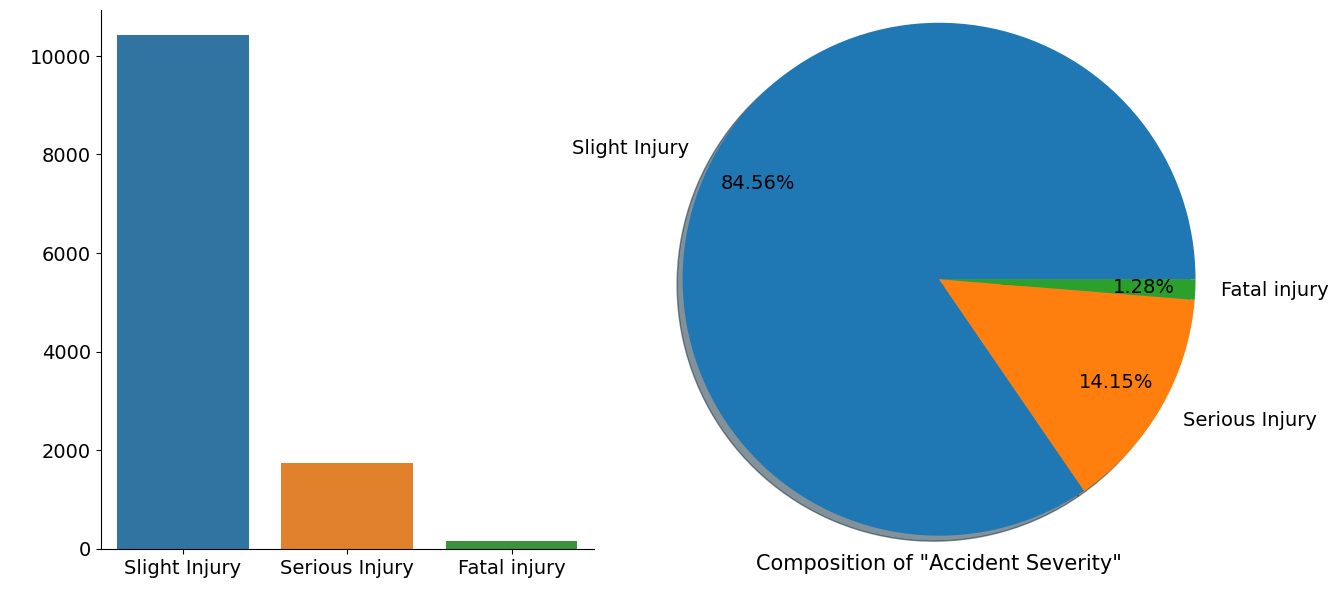

In [21]:
plt.figure(figsize=(14,7))

ax1 = plt.subplot(1,2,1)

cp = sns.countplot(x=rta_data["accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)

ax2 = plt.subplot(1,2,2)

plt.pie(x=rta_data['accident_severity'].value_counts(),labels=list(rta_data["accident_severity"].unique())
        ,autopct='%1.2f%%',pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.show()

#### Converting Time Column to datetime and then extracting hours and minutes for furthers analysis

In [22]:
rta_data['time'] = pd.to_datetime(rta_data['time'])


rta_data['hour'] = rta_data['time'].dt.hour
rta_data['min'] = rta_data['time'].dt.minute

rta_data.drop('time',axis=1,inplace=True)

#### Plotting all the columns to check the count of each categories

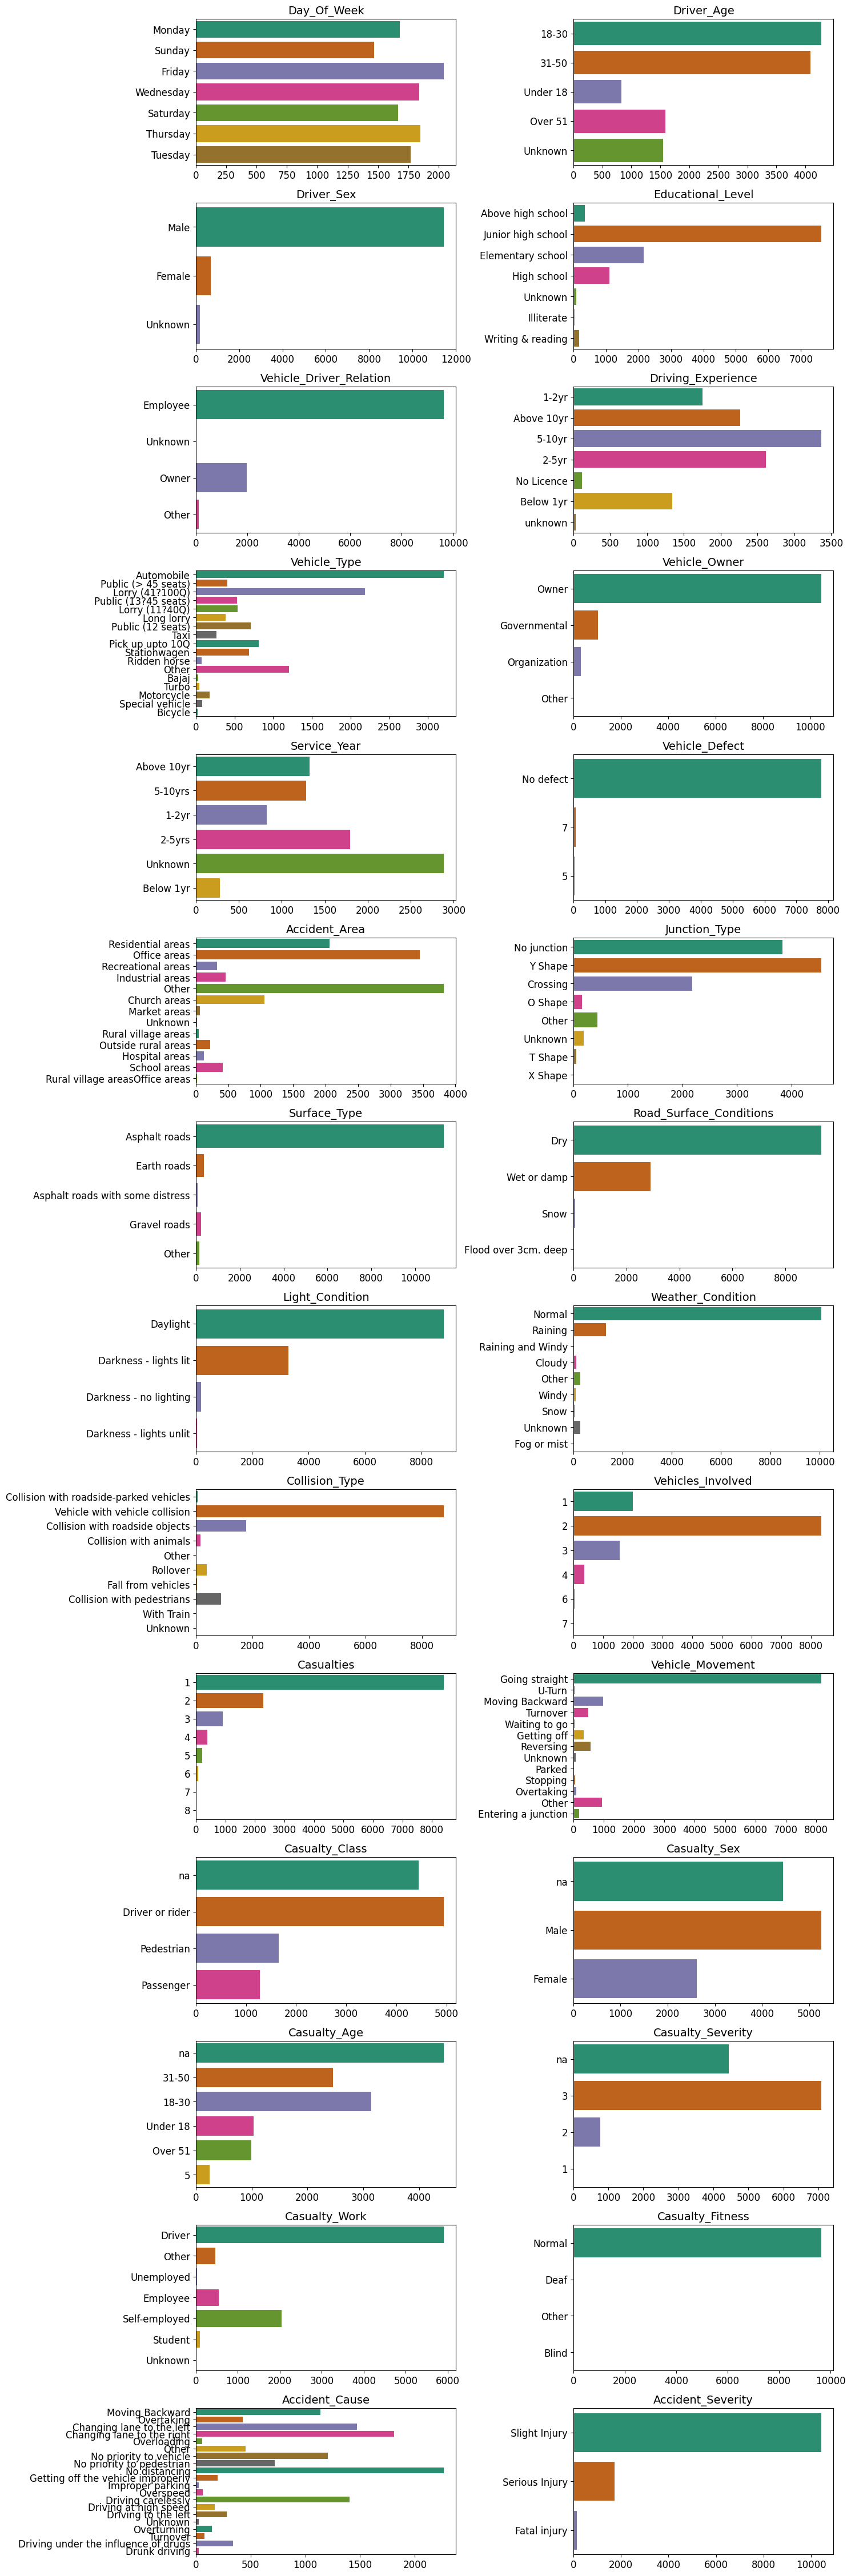

In [23]:
plt.figure(figsize=(15,90))


for i,col in enumerate(rta_data.drop(['hour', 'min', 'lanes', 'road_allignment', 'pedestrian_movement'], axis=1)):
    ax1=plt.subplot(len(rta_data.columns)-5,2,i+1)
    sns.countplot(data=rta_data,y=col,palette='Dark2')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(col.title(), fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()

In [24]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'

In [25]:
#### Plotting Tree chart 

In [26]:
fig = px.treemap(rta_data, path=['accident_cause'], width=800, height=400)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25))
# fig.show()

py.init_notebook_mode(connected=True)
py.iplot(fig,filename= "treemap")

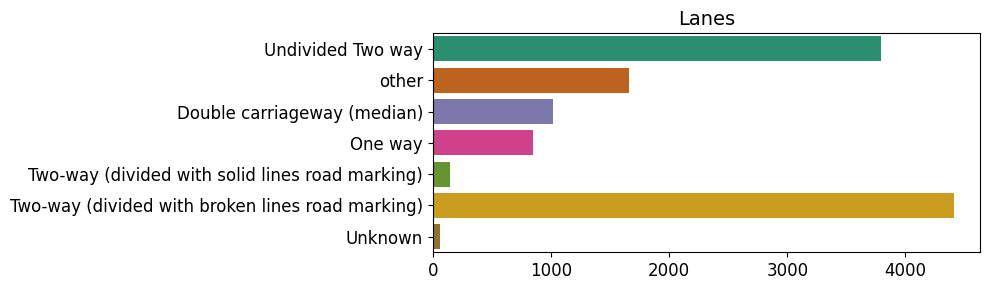

In [27]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='lanes', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

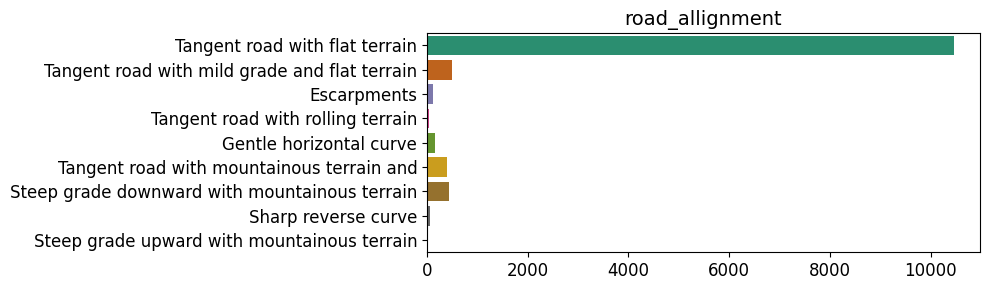

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('road_allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

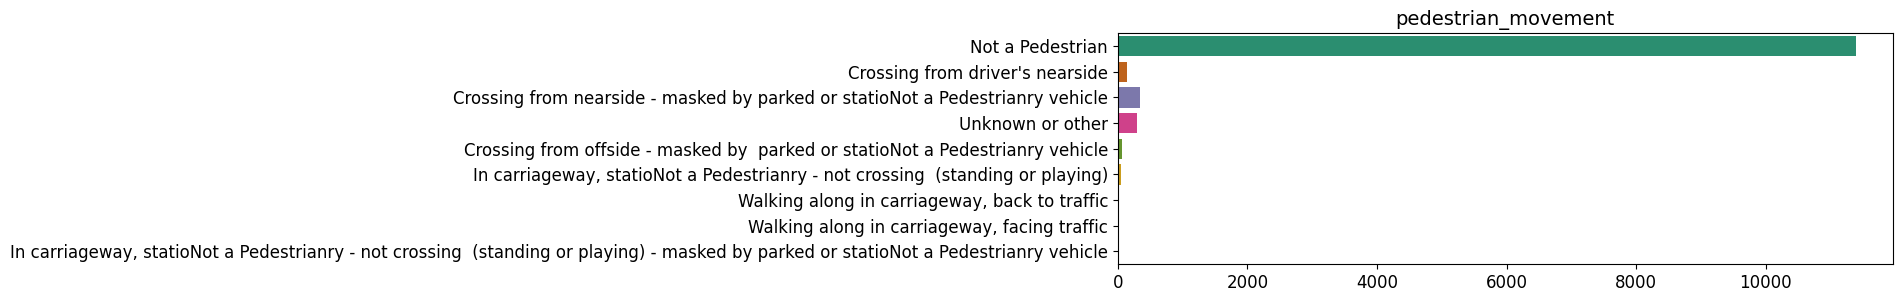

In [29]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pedestrian_movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

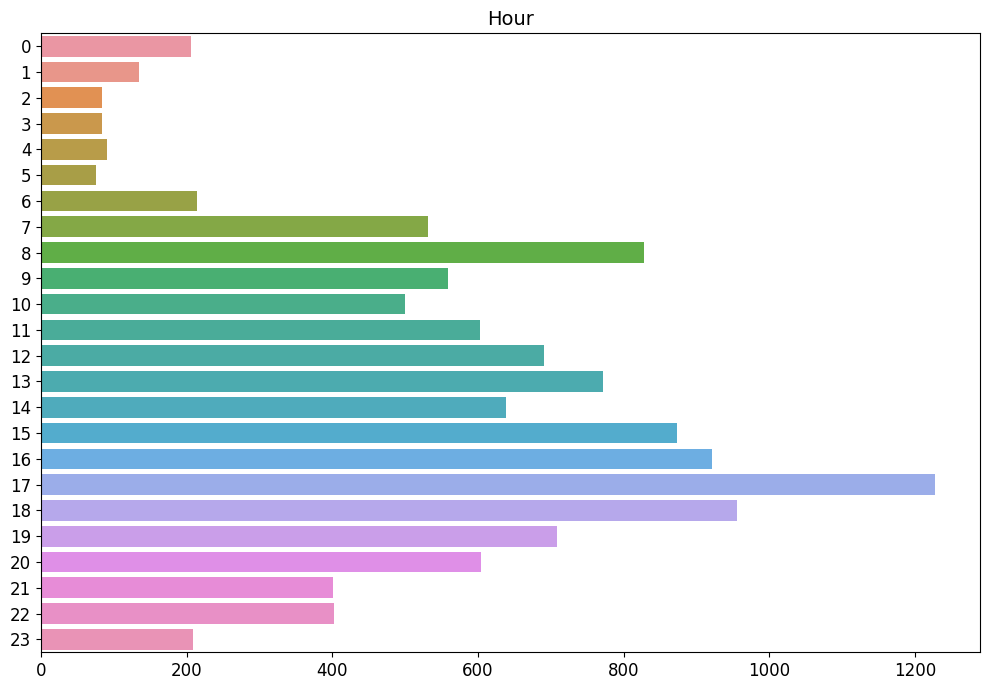

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(data=rta_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

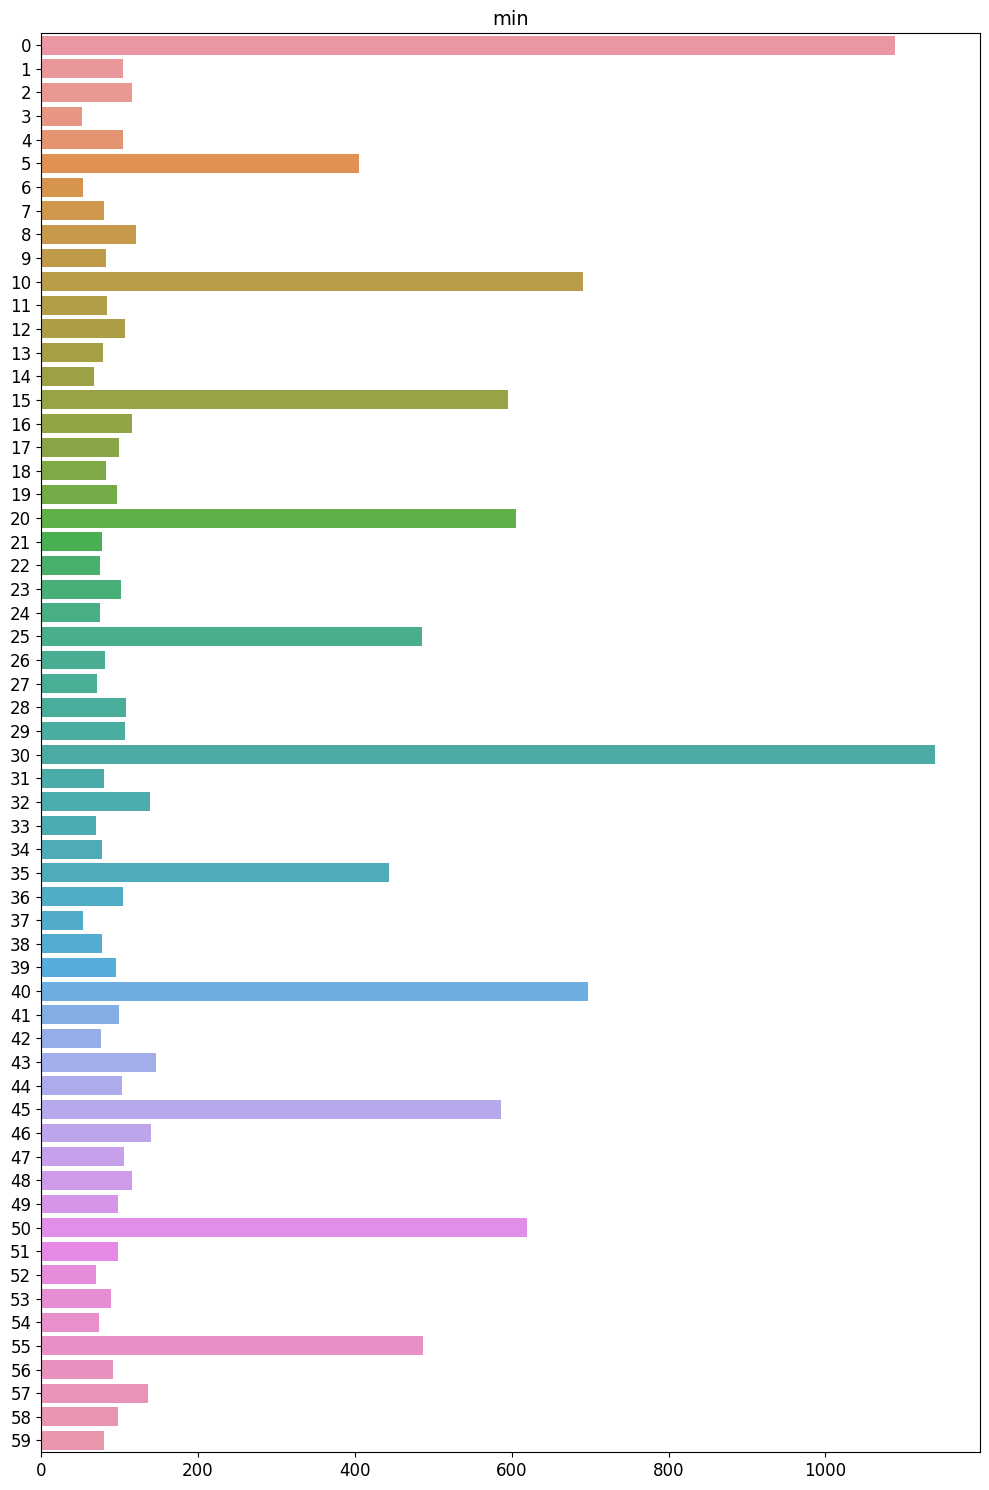

In [31]:
plt.figure(figsize=(10,15))
sns.countplot(data=rta_data, y='min')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('min', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### Observations

**DateTime Based Insights**
- Significant amount of accidents occur everyday with Friday accounting for most number of accidents
- Most of the accidents occur between 4 PM - 6 PM with peak numbers at 

**Demographic Based Insights**
- Adult Male drivers (aged 18-50 years) are mostly involved in the road accident
- Most of the drivers are only junior high school passout
- Driver or rider are most likely to be meet with accident as compared to passenger or a pedestrian
- Surprisingly, most experienced drivers have met with accidents
- Automobiles are mostly involved in car accidents
- Residential and Office areas are the red zone in terms of accidents

**External Factors affecting accidents**
- Improper distancing between two vehicles and drivers unneccessarily changing lane(left and right) has led to more accidents
- Y-Shaped junctions and no junctions has led to more number of accidents
- Dry Ashphalt Tangent roads with flat terrain are contributing to more number of injuries which shows that cause of accidents are not adverse conditions. Surprisingly, contribution of wet roads to accidents are fairly low
- Another surprising fact is that most of accidents have occured in normal weather conditions with daylight which can only mean that accidents are occuring due to rash driving or driver not following the traffic safety rules
- Maximum accidents are happening b/w atleast two cars with head to head collisions which is not ideal in terms of safety
- Undivided Two way lanes and two way lanes with broken lines road marking shows carelessness on part of road authority department and have led to more number of casualities
 

### 3.2 Bivariate and Multivariate analysis

In [32]:
rta_data.columns

Index(['day_of_week', 'driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation', 'driving_experience', 'vehicle_type',
       'vehicle_owner', 'service_year', 'vehicle_defect', 'accident_area',
       'lanes', 'road_allignment', 'junction_type', 'surface_type',
       'road_surface_conditions', 'light_condition', 'weather_condition',
       'collision_type', 'vehicles_involved', 'casualties', 'vehicle_movement',
       'casualty_class', 'casualty_sex', 'casualty_age', 'casualty_severity',
       'casualty_work', 'casualty_fitness', 'pedestrian_movement',
       'accident_cause', 'accident_severity', 'hour', 'min'],
      dtype='object')

In [33]:
def bivariate_analysis_with_accident_severity(feature):
    """
    Takes an dependent feature and plots chart with classification target variable
    """
    pivot_df = pd.pivot_table(rta_data[[feature,'accident_severity']], index=feature,
                              columns='accident_severity', aggfunc=len)
    pivot_df.plot(kind='bar', stacked=True,figsize=(6,6))
    plt.title(f'Distribution of {feature} by accident_severity')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [34]:
rta_data.drop(columns=['driver_age', 'driver_sex', 'educational_level',
       'vehicle_driver_relation','hour', 'min', 'lanes', 'road_allignment', 'pedestrian_movement',
                             'vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'])

,day_of_week,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,junction_type,surface_type,road_surface_conditions,light_condition,...,collision_type,vehicles_involved,casualties,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,accident_cause,accident_severity
0,Monday,1-2yr,Automobile,Owner,Above 10yr,Residential areas,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Moving Backward,Slight Injury
1,Monday,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Overtaking,Slight Injury
2,Monday,1-2yr,Lorry (41?100Q),Owner,NaN,Recreational areas,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Changing lane to the left,Serious Injury
3,Sunday,5-10yr,Public (> 45 seats),Governmental,NaN,Office areas,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Changing lane to the right,Slight Injury
4,Sunday,2-5yr,NaN,Owner,5-10yrs,Industrial areas,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,2-5yr,Lorry (11?40Q),Owner,NaN,Outside rural areas,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,No distancing,Slight Injury
12312,Sunday,5-10yr,Automobile,Owner,NaN,Outside rural areas,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,na,No distancing,Slight Injury
12313,Sunday,5-10yr,Bajaj,Owner,2-5yrs,Outside rural areas,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Changing lane to the right,Serious Injury
12314,Sunday,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,Office areas,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driving under the influence of drugs,Slight Injury


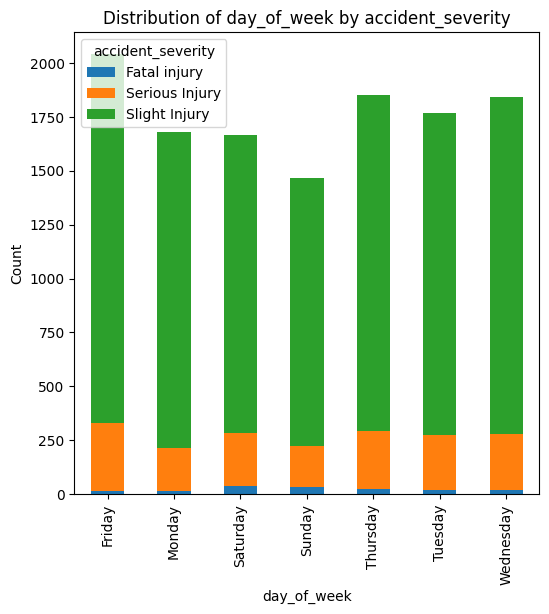

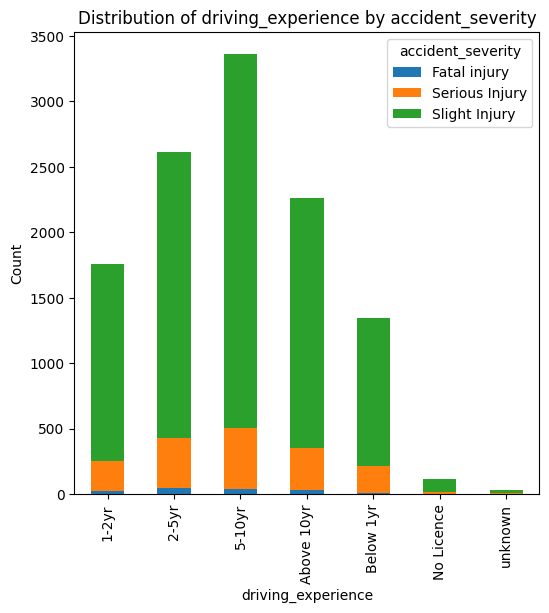

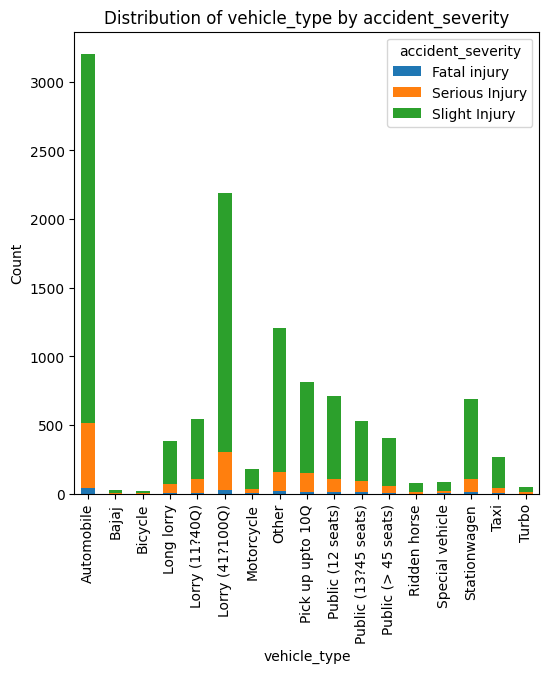

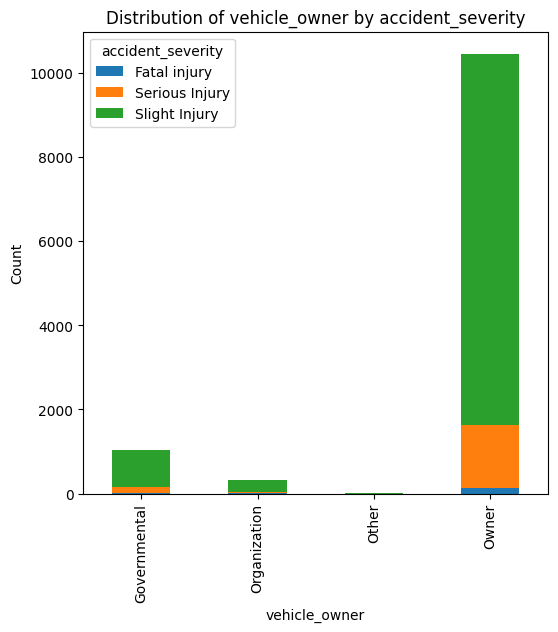

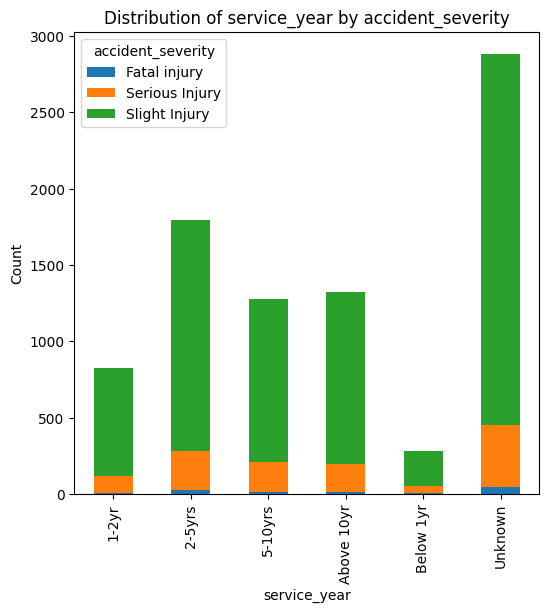

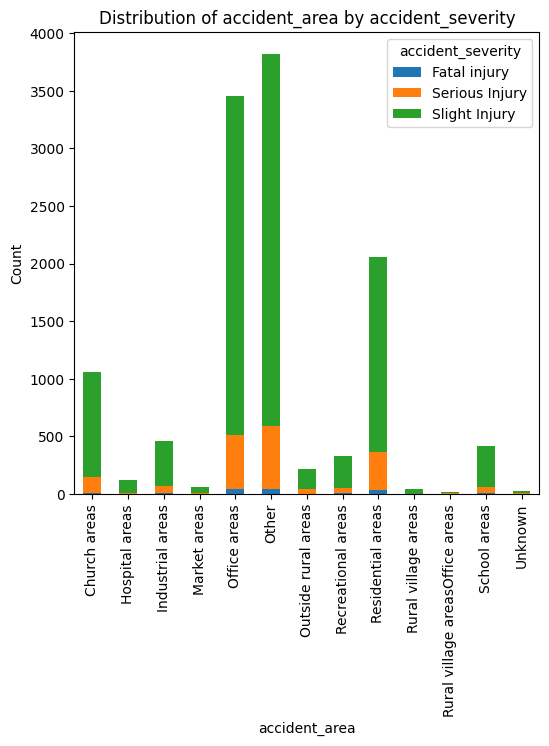

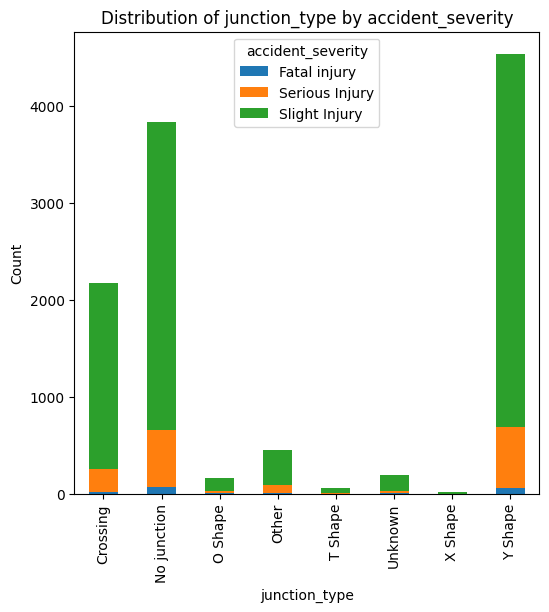

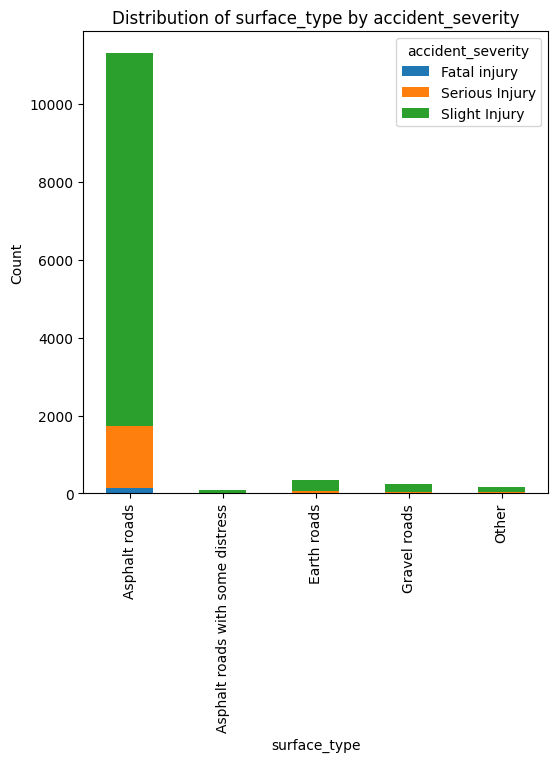

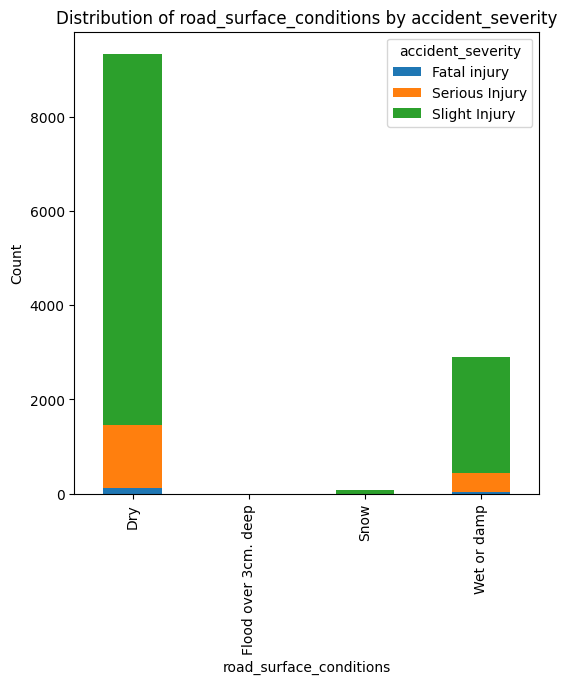

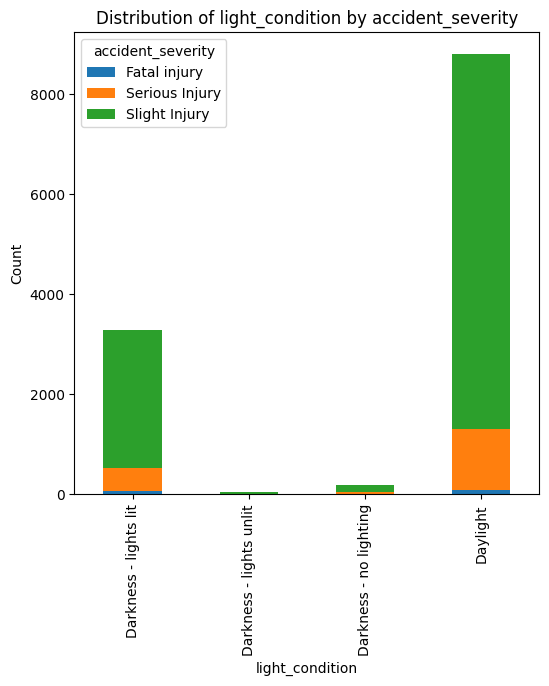

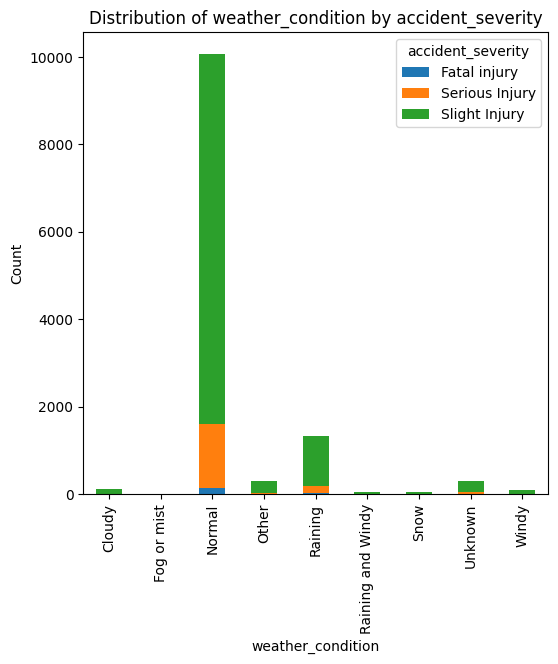

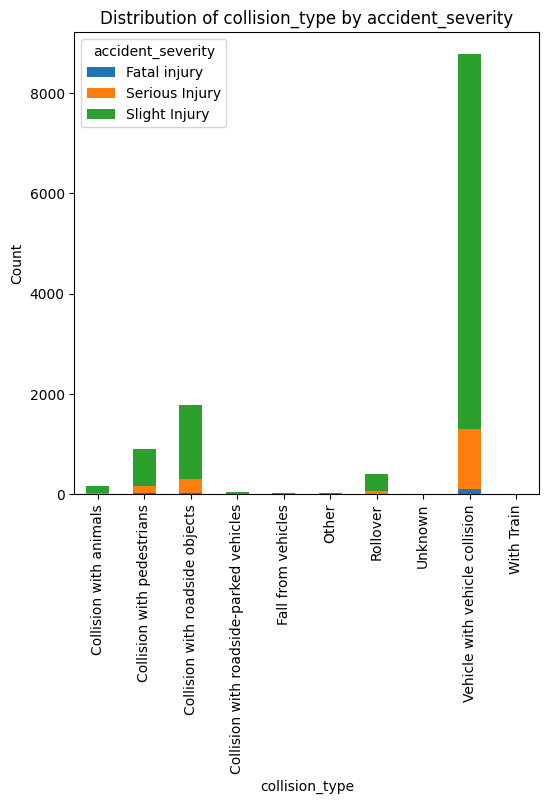

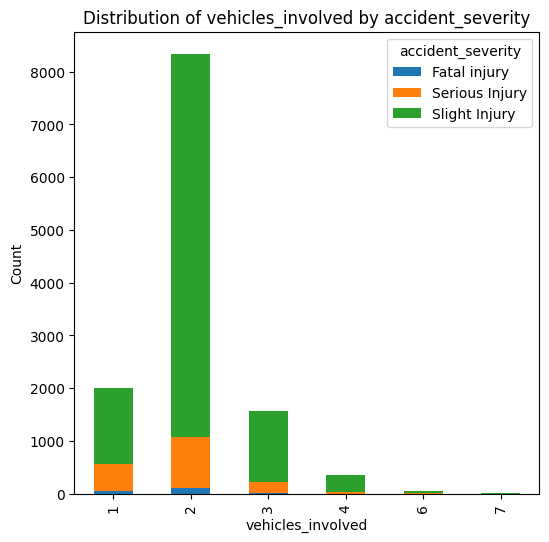

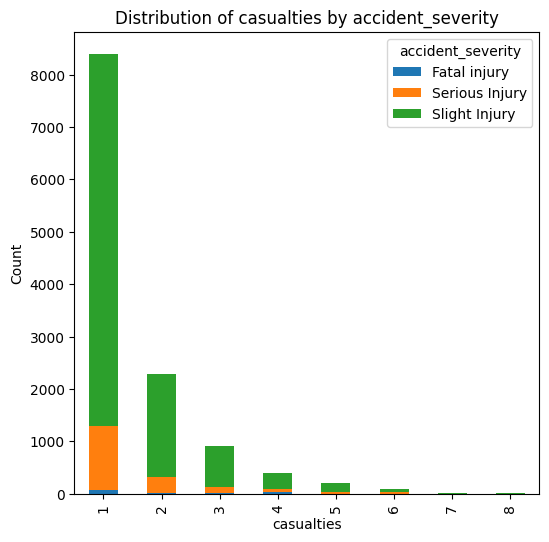

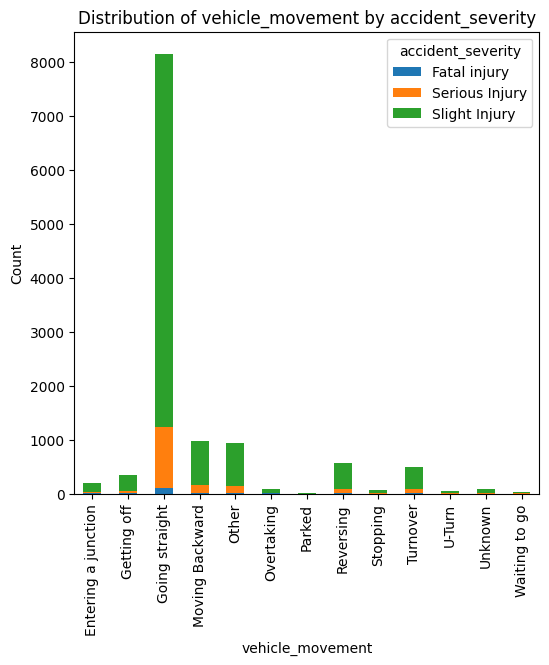

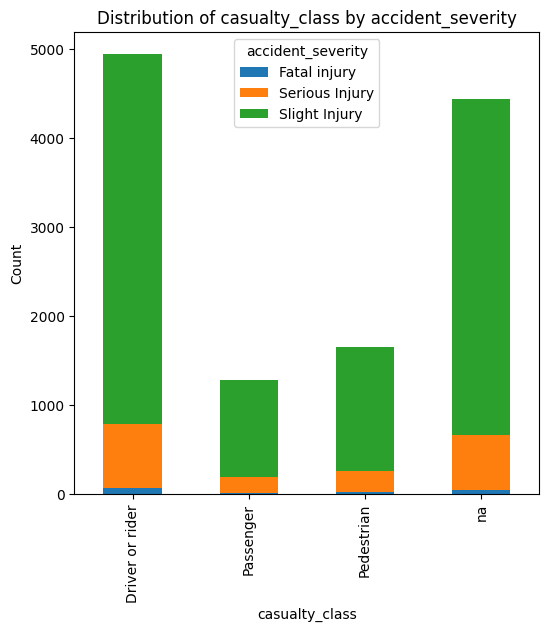

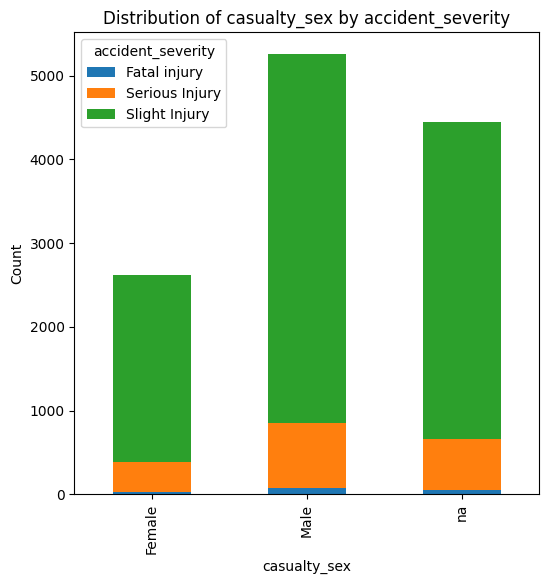

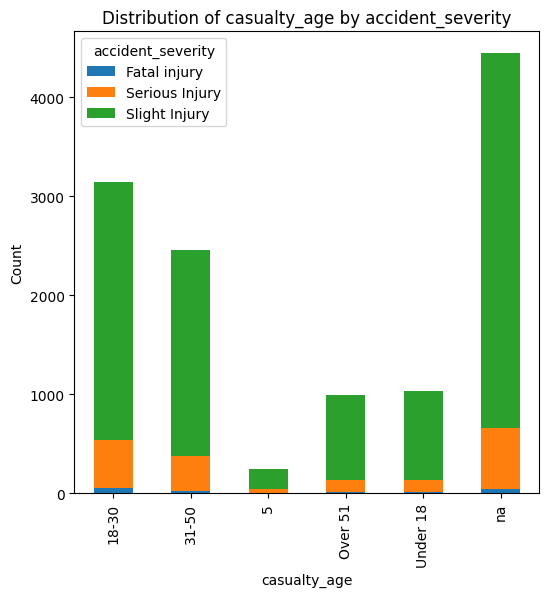

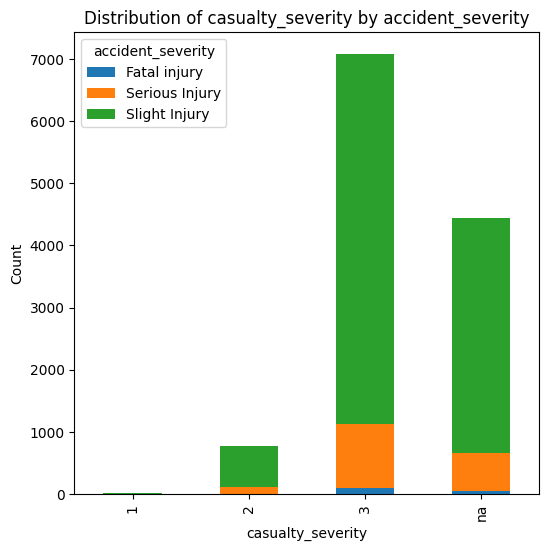

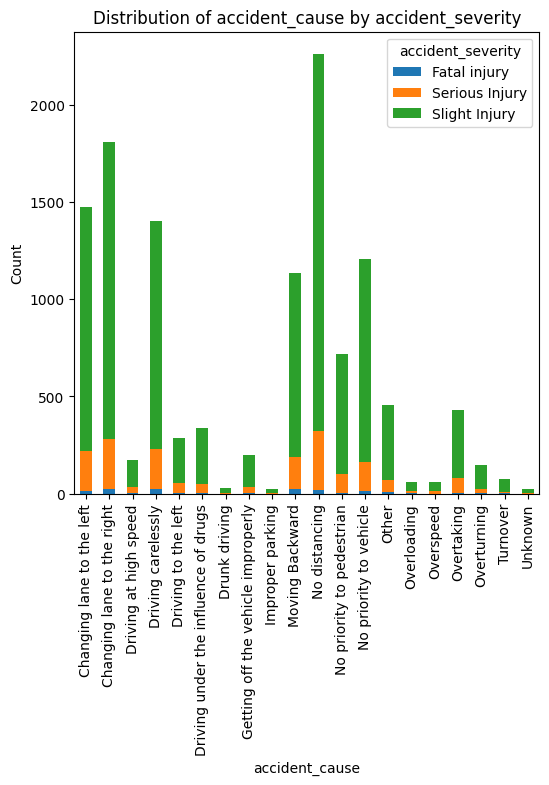

Grouper for 'accident_severity' not 1-dimensional


In [35]:
try:
    for col in rta_data.drop(columns=['driver_age', 'driver_sex', 'educational_level',
           'vehicle_driver_relation','hour', 'min', 'lanes', 'road_allignment', 'pedestrian_movement',
                                 'vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness']):
        bivariate_analysis_with_accident_severity(col)
        
except Exception as e:
    print(e)
    

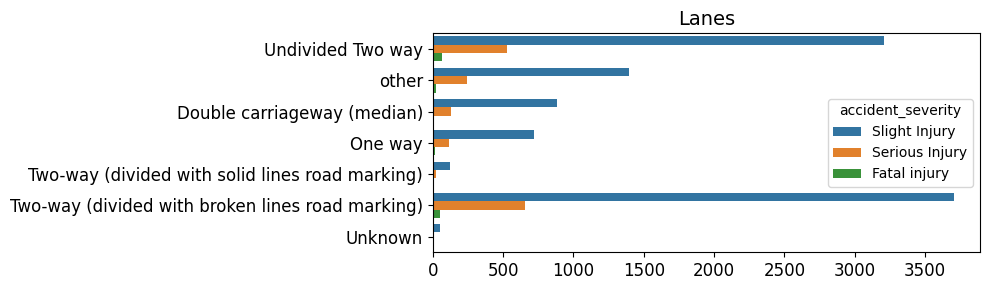

In [36]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='lanes',hue='accident_severity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

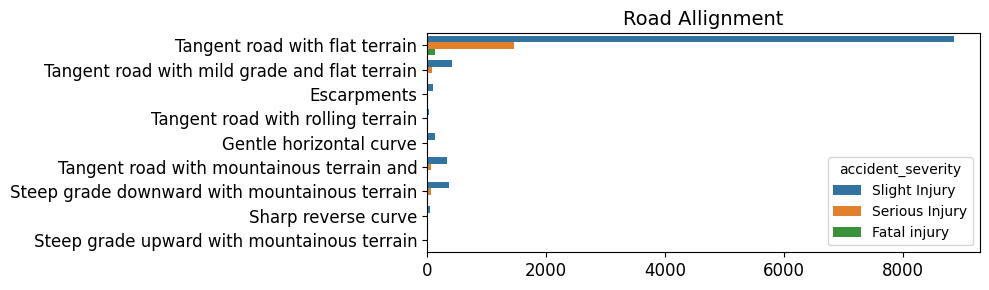

In [37]:
plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='road_allignment', hue='accident_severity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

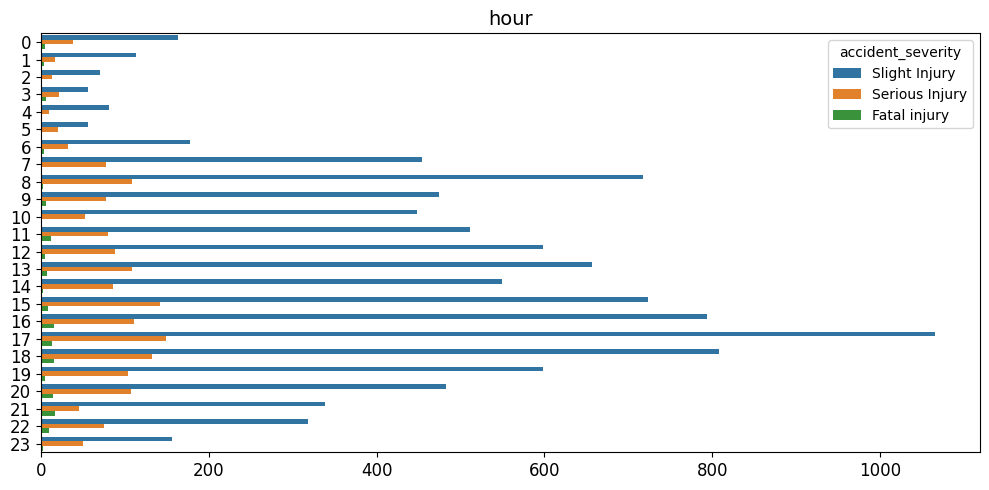

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='hour', hue='accident_severity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

### Observations

- Although, lesser accidents happen on weekends but more proportion of fatal injuries happen on weekends
- Driver with 2-5 years of experience are more involved in accidents with fatal injuries while drivers with 5-10 years are more involved in accidents which lead to non-fatal injuries
- Vehicles that are serviced recently are unlikely to lead to serious accidents
- Residential area have led to more serious and fatal injuries
- Y shaped junction lead to more number of accidents. However, more fatal injury cases are accounted at roads with no junction
- More fatal accidents tend to occur in artificial lights 
- Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

## 4. Data Preprocessing

In [39]:
processed_data = rta_data.copy()

### 4.1 Handling Missing Values

In [40]:
processed_data.isna().mean()

day_of_week                0.000000
driver_age                 0.000000
driver_sex                 0.000000
educational_level          0.060166
vehicle_driver_relation    0.047012
driving_experience         0.067311
vehicle_type               0.077135
vehicle_owner              0.039136
service_year               0.318935
vehicle_defect             0.359451
accident_area              0.019406
lanes                      0.031260
road_allignment            0.011530
junction_type              0.072020
surface_type               0.013966
road_surface_conditions    0.000000
light_condition            0.000000
weather_condition          0.000000
collision_type             0.012585
vehicles_involved          0.000000
casualties                 0.000000
vehicle_movement           0.025008
casualty_class             0.000000
casualty_sex               0.000000
casualty_age               0.000000
casualty_severity          0.000000
casualty_work              0.259662
casualty_fitness           0

In [41]:
# dropping columns that can cause imbalance while imputation
processed_data.drop(columns = ['vehicle_defect', 'vehicle_driver_relation', 'casualty_work', 'casualty_fitness'], inplace=True)

In [42]:
impute_cols = [x for x in processed_data.isna().sum()[processed_data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = processed_data[feat].mode()[0]
    processed_data[feat].fillna(mode, inplace=True)

In [43]:
processed_data.isna().sum()

day_of_week                0
driver_age                 0
driver_sex                 0
educational_level          0
driving_experience         0
vehicle_type               0
vehicle_owner              0
service_year               0
accident_area              0
lanes                      0
road_allignment            0
junction_type              0
surface_type               0
road_surface_conditions    0
light_condition            0
weather_condition          0
collision_type             0
vehicles_involved          0
casualties                 0
vehicle_movement           0
casualty_class             0
casualty_sex               0
casualty_age               0
casualty_severity          0
pedestrian_movement        0
accident_cause             0
accident_severity          0
hour                       0
min                        0
dtype: int64

There are few columnns which have na and Unknown values. It is better to not impute them as they are not missing at random and have been assigned as separate category

### 4.2 Encoding

In [44]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df

processed_data = ordinal_encoder(processed_data, processed_data.drop(['accident_severity'], axis=1).columns)
processed_data.shape

(12316, 29)

In [45]:
processed_data.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,min
0,1,0,1,0,0,0,3,3,8,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,4,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,7,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,4,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,2,6,...,2,3,2,5,3,5,16,Slight Injury,1,6


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = processed_data.drop('accident_severity', axis=1)
y = processed_data['accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


### 4.3 Upsampling

We have an imbalanced dataset, so either we can upsample or downsample. Since, the we do not have sufficient amount of records to downsample it is better option to upsample

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [49]:
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [50]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

## 5. Baseline Modelling

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,KFold

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
def classify(model):
    model.fit(X_train,y_train)
    print(f'Accuracy is {model.score(X_test,y_test)*100}')
    
    score = cross_val_score(model,X,y,cv=5)
    print(f'CV Score is {np.mean(score)*100}')

    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred,average='macro')

    print("F1 score:", f1)
    
    report = classification_report(y_test, y_pred)
    print(report)

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy is 69.74289580514208
CV Score is 73.31104568391413
F1 score: 0.4141188510611902
              precision    recall  f1-score   support

           0       0.14      0.23      0.17        52
           1       0.21      0.32      0.26       552
           2       0.86      0.77      0.81      3091

    accuracy                           0.70      3695
   macro avg       0.40      0.44      0.41      3695
weighted avg       0.75      0.70      0.72      3695



In [55]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy is 79.5128552097429
CV Score is 84.72715342919363
F1 score: 0.36794198700541103
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.28      0.18      0.22       552
           2       0.85      0.92      0.88      3091

    accuracy                           0.80      3695
   macro avg       0.38      0.37      0.37      3695
weighted avg       0.75      0.80      0.77      3695



In [56]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        #xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
        models.append(xgb)


    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
        models.append(extree)

      
        
    return scores,models

In [57]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)
print(scores)

{'xgb': [0.8100135317997293], 'rf': [0.7989174560216509], 'extree': [0.8124492557510149]}


In [58]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
from mlxtend.evaluate import mcnemar_table, mcnemar_tables
from mlxtend.plotting import checkerboard_plot, plot_decision_regions

Since all the tested models are giving approximately equal accuracy scores, we will further check the performance and efficiency of each model

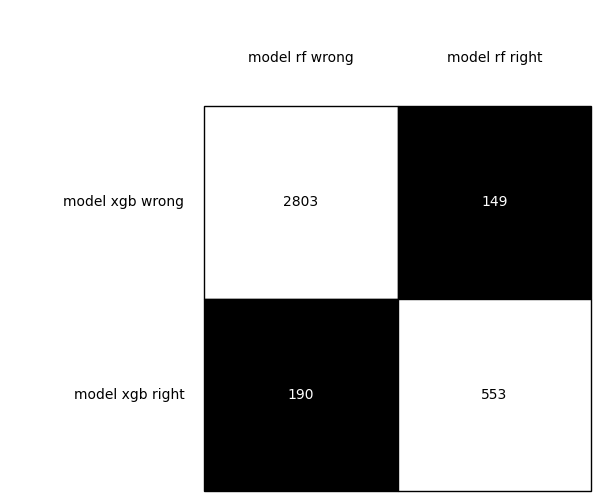

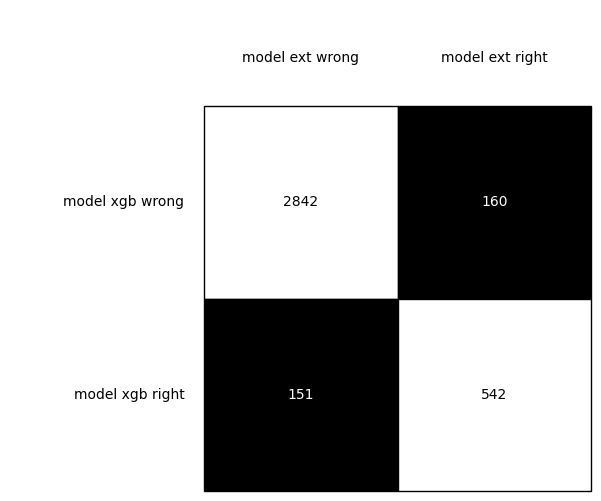

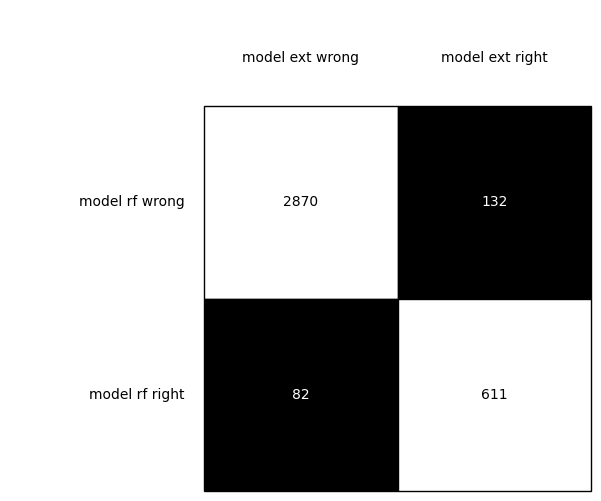

In [60]:
y_pred_xgb = models[0].predict(X_test)
y_pred_rf = models[1].predict(X_test)
y_pred_ext = models[2].predict(X_test)


tb = mcnemar_tables(y_test, 
                    y_pred_xgb,
                    y_pred_rf, 
                    y_pred_ext)

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model rf wrong', 'model rf right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_0 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model xgb wrong', 'model xgb right'])
plt.show()

brd = checkerboard_plot(tb['model_1 vs model_2'],
                        figsize=(5, 5),
                        fmt='%d',
                        col_labels=['model ext wrong', 'model ext right'],
                        row_labels=['model rf wrong', 'model rf right'])
plt.show()

In [61]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig,filename='model-performance')

In [62]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [63]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
model_performance(extree,y_test, y_pred)

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## 6. Hyperparameter Tuning

In [65]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500]
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.8616013935230052)

In [66]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': None, 'max_depth': 15, 'min_samples_split': 2},
 0.9186710252825266)

In [67]:
gkf3 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params3 = {
    'max_depth': [20,25],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree3 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3)

gsearch3 = GridSearchCV(
    estimator= extree3,
    param_grid= params3,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf3,
    verbose=3,
)

extree_model3 = gsearch3.fit(X=X_train, y=y_train)

(gsearch3.best_params_, gsearch3.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


({'class_weight': 'balanced', 'max_depth': 25, 'min_samples_split': 2},
 0.9459930095907284)

In [68]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 25,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)

ExtraTreesClassifier(class_weight='balanced', max_depth=25, n_estimators=400)

In [69]:
print(extree_tuned.feature_importances_)

[0.05436104 0.05257933 0.01281703 0.03393501 0.04331652 0.04010189
 0.02033989 0.03819994 0.03652884 0.04168579 0.01687481 0.04481361
 0.01163645 0.03573177 0.05457727 0.0172099  0.033339   0.05415413
 0.05437246 0.02495302 0.02864637 0.03080635 0.03092437 0.02211062
 0.01189407 0.04472291 0.04721669 0.06215092]


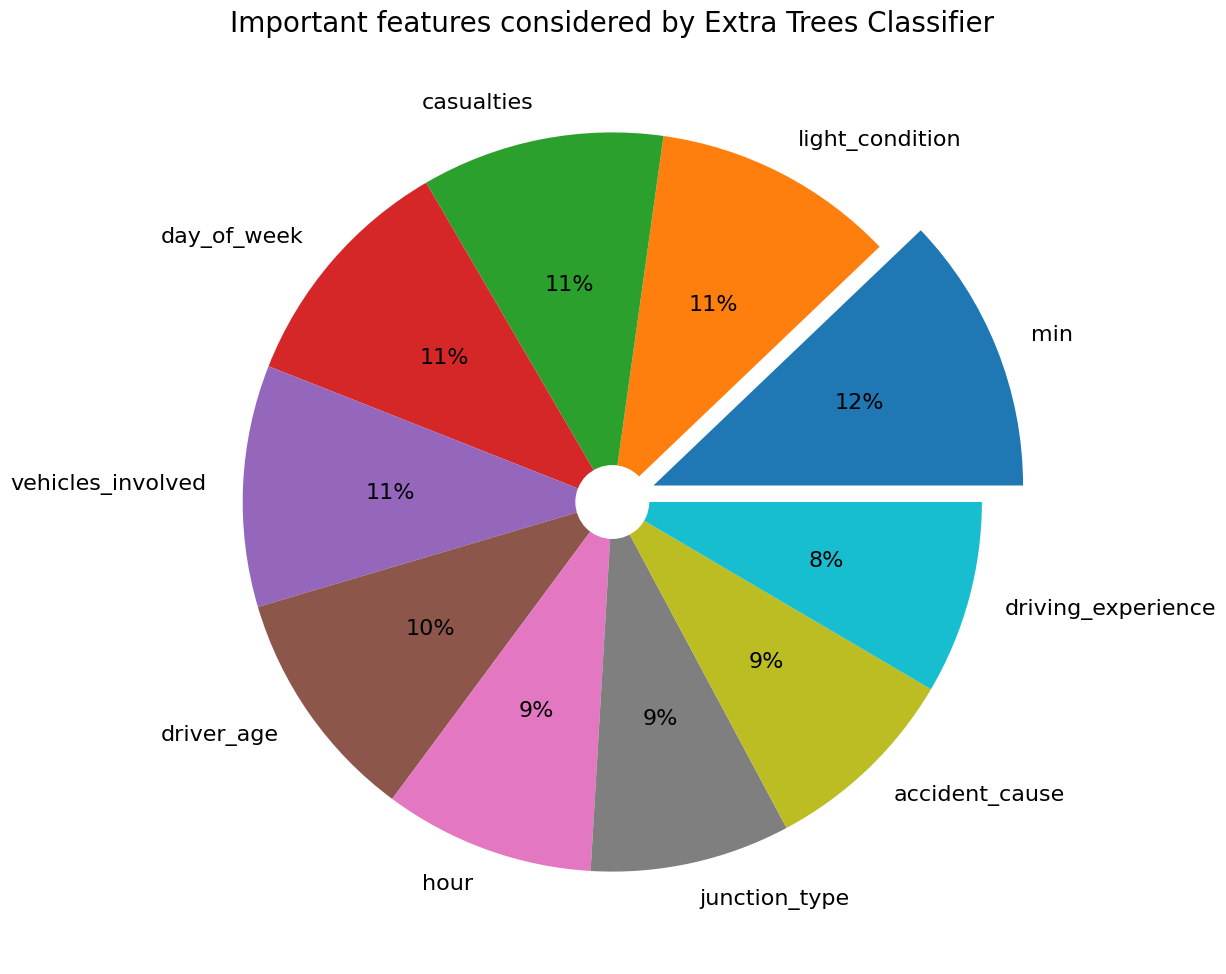

In [70]:
feat_importances = pd.Series(extree_tuned.feature_importances_, index=X.columns)
plt.figure(figsize=(12,12))
myexplode = [0.12,0,0,0,0,0,0,0,0,0]
plt.pie(feat_importances.nlargest(10),labels=feat_importances.nlargest(10).index, autopct='%.0f%%',explode= myexplode,
        textprops={'fontsize': 16})
centre_circle = plt.Circle((0,0),0.10,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Important features considered by Extra Trees Classifier',fontsize=20)
plt.show()

In [87]:
import joblib

In [ ]:
model = extree_tuned

In [ ]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [1]:
# For deployment and Shap XAI values we'll train model on only 10 useful features that would be helpful and users aren't expected to input all the values 

In [71]:
processed_data.head()

,day_of_week,driver_age,driver_sex,educational_level,driving_experience,vehicle_type,vehicle_owner,service_year,accident_area,lanes,...,vehicle_movement,casualty_class,casualty_sex,casualty_age,casualty_severity,pedestrian_movement,accident_cause,accident_severity,hour,min
0,1,0,1,0,0,0,3,3,8,2,...,2,3,2,5,3,5,9,Slight Injury,17,2
1,1,1,1,4,3,11,3,2,4,4,...,2,3,2,5,3,5,16,Slight Injury,17,2
2,1,0,1,4,0,5,3,5,7,6,...,2,0,1,1,2,5,0,Serious Injury,17,2
3,3,0,1,4,2,11,0,5,4,6,...,2,2,0,0,2,5,1,Slight Injury,1,6
4,3,0,1,4,1,0,3,2,2,6,...,2,3,2,5,3,5,16,Slight Injury,1,6


In [72]:
processed_data.shape

(12316, 29)

In [73]:
x = processed_data[['hour','day_of_week','casualties','accident_cause','vehicles_involved','vehicle_type','driver_age','accident_area','driving_experience','lanes']]
Y = processed_data['accident_severity']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 10) (3695, 10) (8621,) (3695,)


In [75]:
counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 10) (21972,)


In [76]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['accident_severity']), pd.DataFrame(y_test, columns = ['accident_severity']).columns)['accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['accident_severity']), pd.DataFrame(y_train, columns = ['accident_severity']).columns)['accident_severity']

In [77]:
X_train.to_csv('selected_features.csv')

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [83]:
y_pred = rf.predict(X_test)

In [84]:
print(f'Accuracy is {rf.score(X_test,y_test)*100}')

score = cross_val_score(rf,x,Y,cv=5)
print(f'CV Score is {np.mean(score)*100}')

f1 = f1_score(y_test, y_pred,average='weighted')

print("F1 score:", f1)

report = classification_report(y_test, y_pred)
print(report)

Accuracy is 75.4533152909337
CV Score is 84.1506569962721
F1 score: 0.7547444760437072
              precision    recall  f1-score   support

           0       0.07      0.08      0.08        52
           1       0.25      0.25      0.25       552
           2       0.86      0.86      0.86      3091

    accuracy                           0.75      3695
   macro avg       0.39      0.39      0.39      3695
weighted avg       0.75      0.75      0.75      3695



In [86]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),  # [100,200,300,400,500],
    'criterion': ['gini'],
    'max_depth': [5,10,20],
    'min_samples_split': [2,3,5],
}

rf = RandomForestClassifier()

gsearch = GridSearchCV(
    estimator= rf,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=1,
)


rf_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


({'criterion': 'gini',
  'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.897376551462675)

In [90]:
model1 = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=2,n_estimators=300)
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=300)

In [91]:
joblib.dump(model1, 'rf_model.joblib')

['rf_model.joblib']

In [ ]:
!pip install shap==0.40.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 kB 11.2 MB/s eta 0:00:00


In [ ]:
import shap #(0.38.0>=)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## import your model here, on which you are going to use shap
# from sklearn."class" import "model"

import joblib

%matplotlib inline
sns.set()